# 💬 EDA: Sentiment Classification (NLP)

Welcome to the 21-step Exploratory Data Analysis (EDA) notebook for **Sentiment Classification**.  
This NLP scenario analyzes reviews and predicts sentiment labels (positive, negative, neutral).

---

📁 **Dataset:** `EDA_SentimentClassification_Dataset.csv`  
🎯 **Target Variable:** `sentiment`  
🧠 **Type:** Multiclass Text Classification  


## 📥 Step 1: Load Dataset

In [1]:

import pandas as pd
df = pd.read_csv("EDA_SentimentClassification_Dataset.csv")
df['review_date'] = pd.to_datetime(df['review_date'])
df.head()


,review_id,user_id,review_text,review_length,sentiment_score,platform,language,device_type,region,review_date,sentiment
0,REV00000,USER00861,Terrible service. Never coming back.,240,0.37,AppStore,en,Mobile,Germany,2022-05-26,positive
1,REV00001,USER03773,Very satisfied with the quality.,72,-1.09,Twitter,en,Mobile,UK,2022-07-30,positive
2,REV00002,USER03093,Worst purchase ever!,179,-0.12,AppStore,en,Mobile,US,2022-02-16,neutral
3,REV00003,USER00467,Terrible service. Never coming back.,61,1.08,Web,en,Desktop,Brazil,2021-05-03,negative
4,REV00004,USER04427,Very satisfied with the quality.,66,0.81,AppStore,en,Mobile,Germany,2022-06-25,positive


## 🧾 Step 2: Dataset Overview

In [2]:

print("Shape:", df.shape)
df.info()
df.describe(include='all').T


Shape: (10000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   review_id        10000 non-null  object        
 1   user_id          10000 non-null  object        
 2   review_text      10000 non-null  object        
 3   review_length    10000 non-null  int64         
 4   sentiment_score  10000 non-null  float64       
 5   platform         10000 non-null  object        
 6   language         10000 non-null  object        
 7   device_type      10000 non-null  object        
 8   region           10000 non-null  object        
 9   review_date      10000 non-null  datetime64[ns]
 10  sentiment        10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 859.5+ KB


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
review_id,10000,10000,REV00000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,10000,4281,USER03855,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_text,10000,10,Exceeded expectations!,1024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_length,10000.0,NaN,NaN,NaN,157.1329,20.0,87.0,155.0,228.0,299.0,81.000398
sentiment_score,10000.0,NaN,NaN,NaN,0.00615,-3.97,-0.68,-0.0,0.68,3.81,0.993494
platform,10000,4,Twitter,2556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language,10000,4,en,7009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device_type,10000,3,Mobile,5992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,10000,5,US,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_date,10000,NaN,NaN,NaN,2021-12-29 09:20:00.960000,2020-01-01 00:00:00,2020-12-26 00:00:00,2021-12-28 00:00:00,2023-01-02 00:00:00,2024-01-01 00:00:00,NaN


## 📊 Step 3: Univariate Analysis

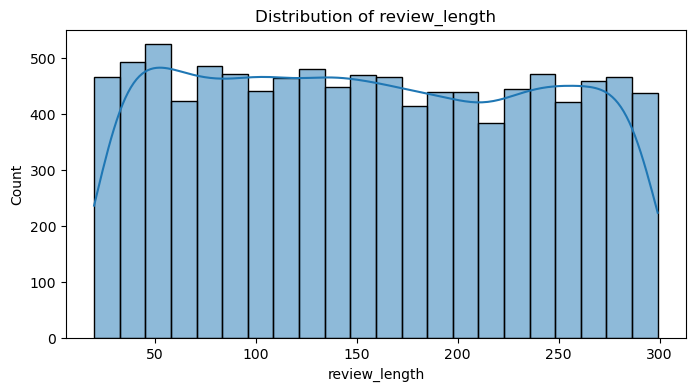

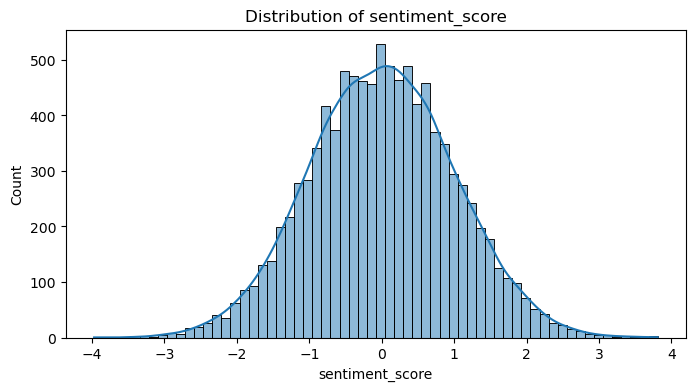

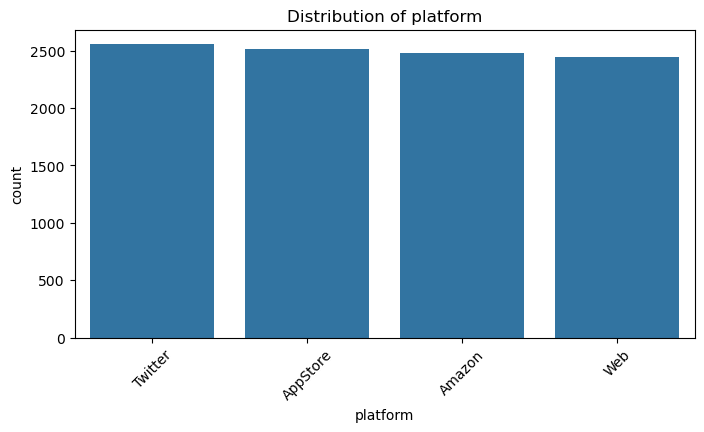

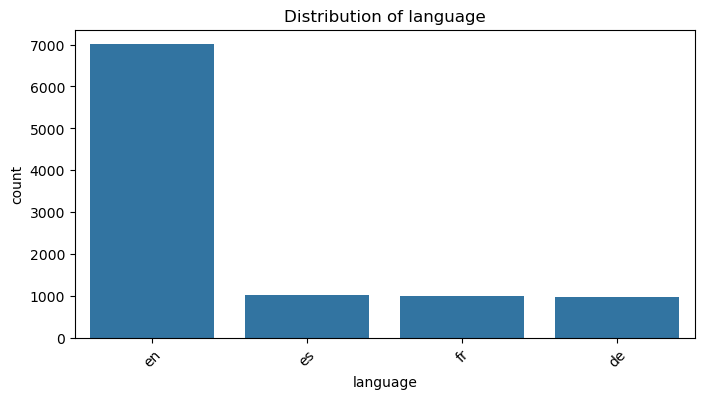

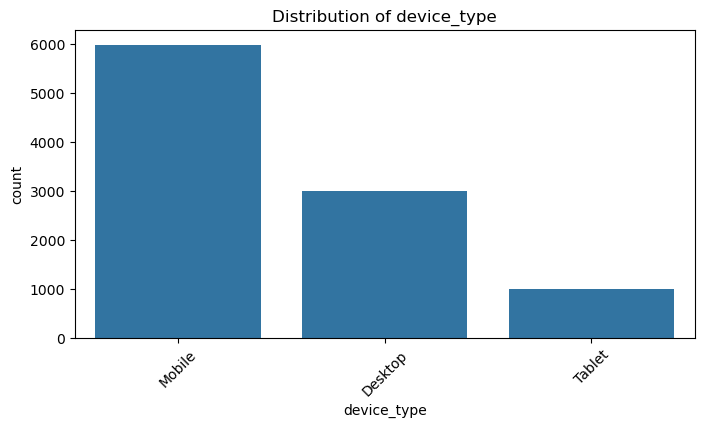

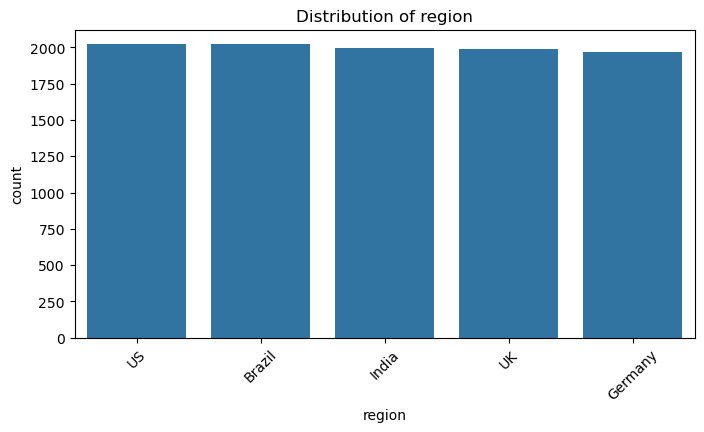

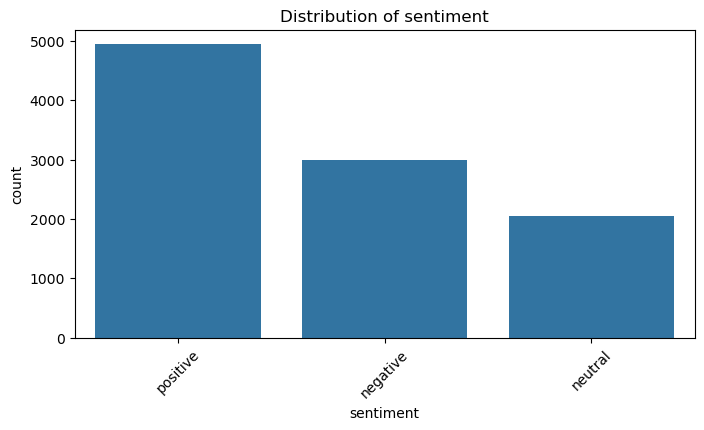

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include='object').drop(['review_id', 'user_id', 'review_text'], axis=1).columns

# Numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


## 📉 Step 4: Bivariate Analysis

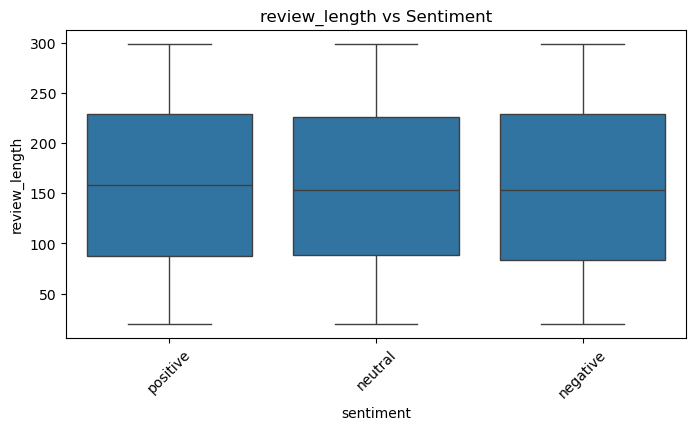

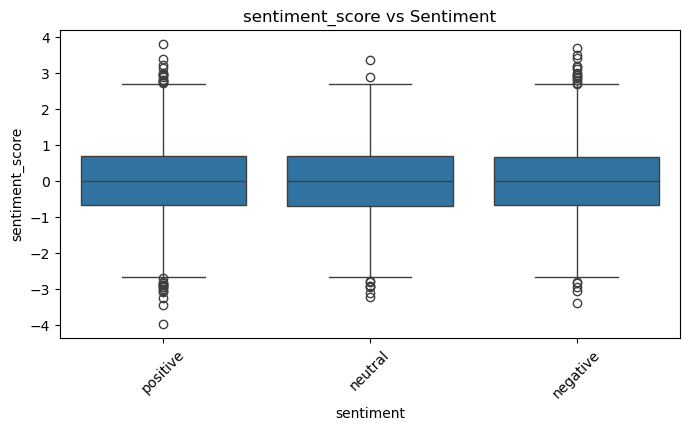

In [4]:

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='sentiment', y=col, data=df)
    plt.title(f'{col} vs Sentiment')
    plt.xticks(rotation=45)
    plt.show()


## 📊 Step 5: Multivariate Analysis

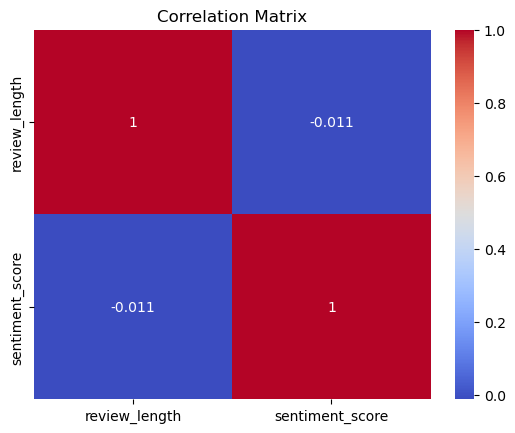

In [5]:

sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## ❓ Step 6: Missing Value Analysis

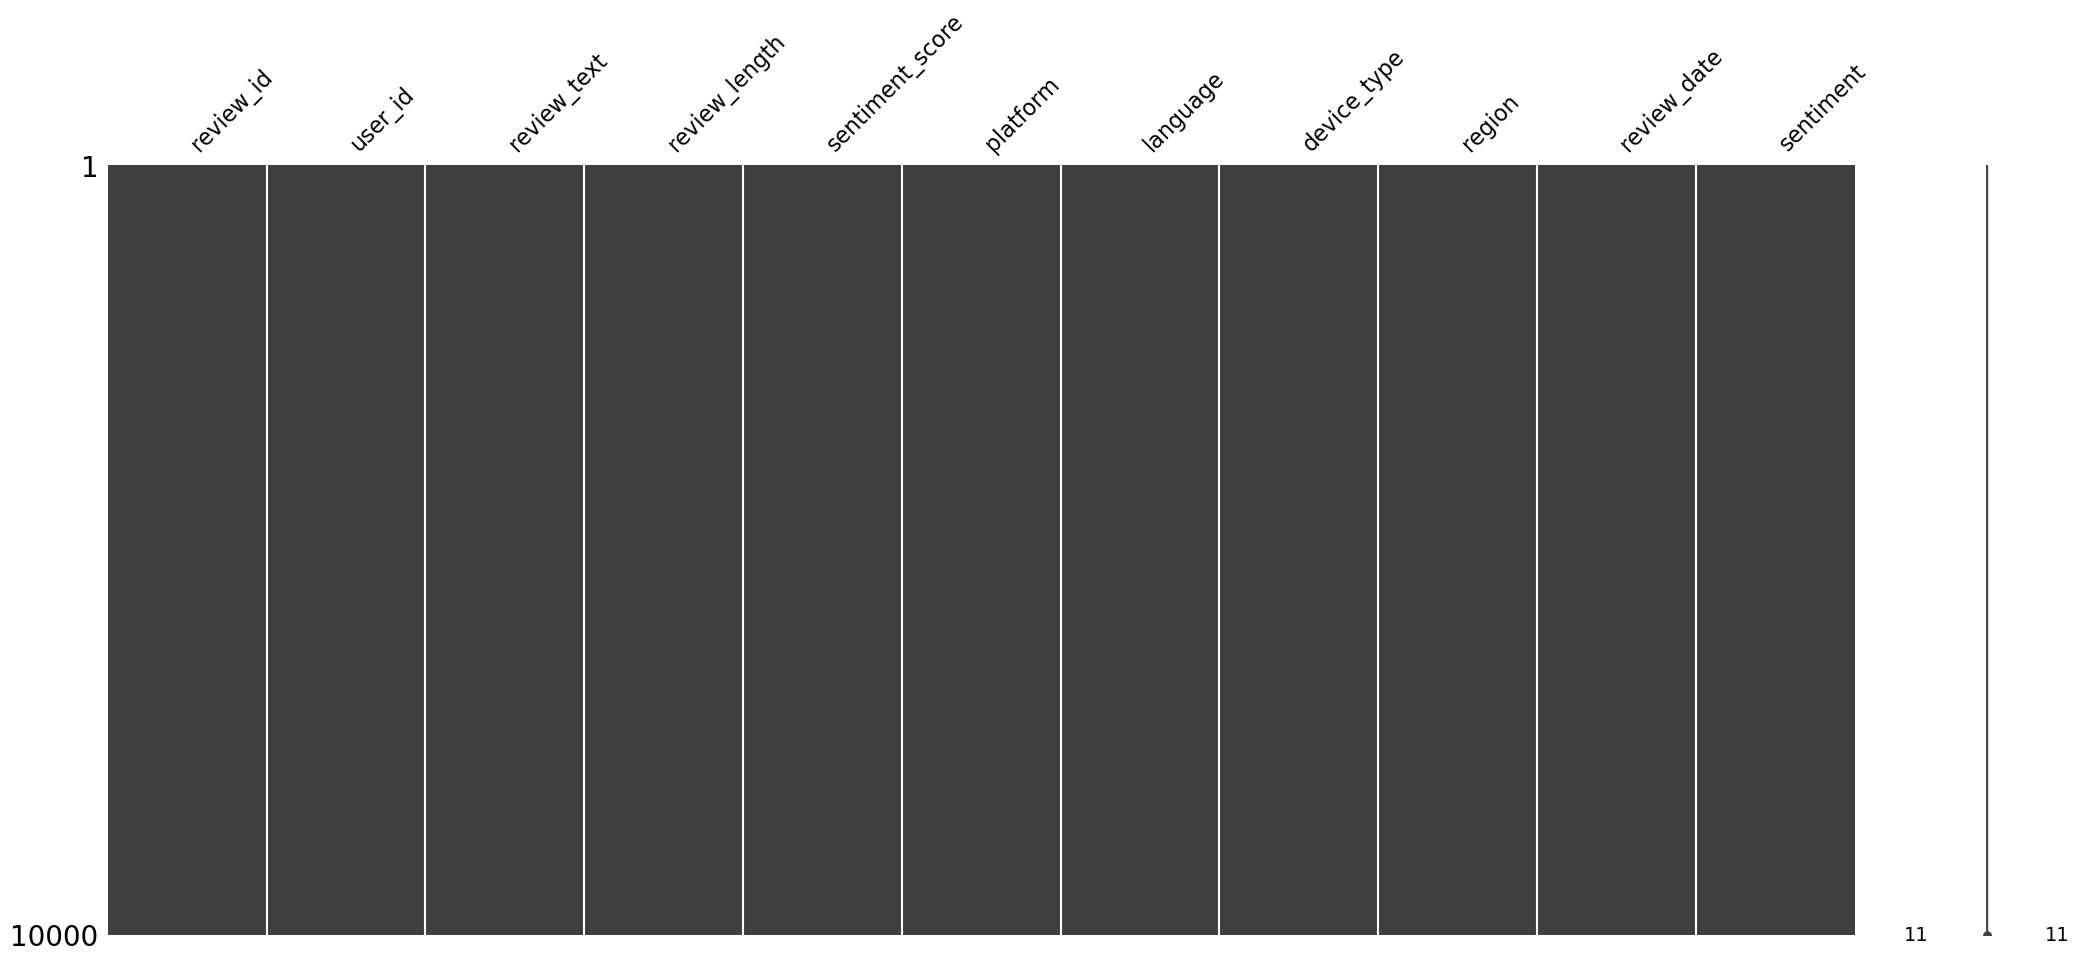

In [6]:

import missingno as msno
msno.matrix(df)
plt.show()


## 🚨 Step 7: Outlier Detection

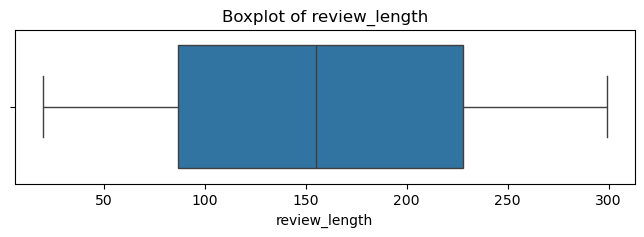

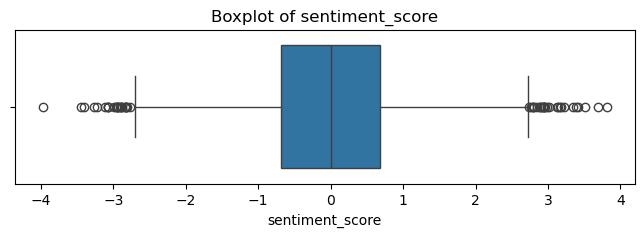

In [7]:

for col in numerical_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## 🔄 Step 8: Skewness & Transformation

In [8]:

from scipy.stats import skew
import numpy as np

skew_vals = df[numerical_cols].apply(lambda x: skew(x.dropna()))
print(skew_vals)

# Log transform if needed
for col in skew_vals[skew_vals > 1].index:
    df[f'{col}_log'] = np.log1p(df[col])


review_length      0.046313
sentiment_score    0.020458
dtype: float64


## 🎯 Step 9: Target Analysis

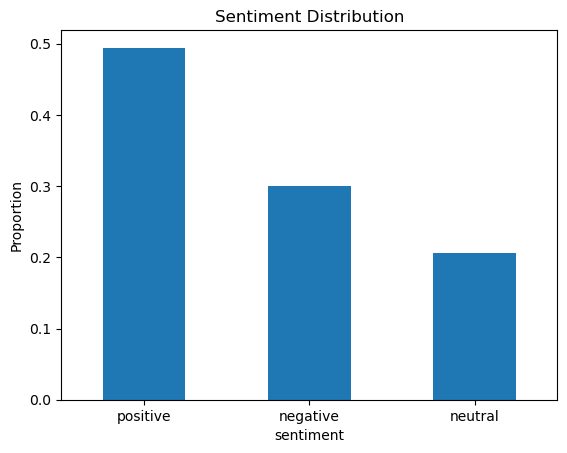

In [9]:

df['sentiment'].value_counts(normalize=True).plot(kind='bar')
plt.title("Sentiment Distribution")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()


## 🔗 Step 10: Correlation Analysis

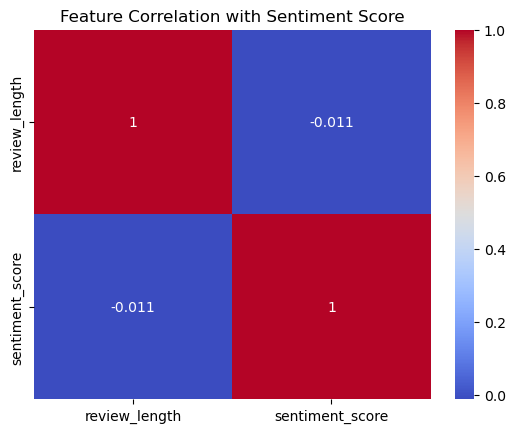

In [10]:

sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Sentiment Score")
plt.show()


## ⚖️ Step 11: Class Imbalance

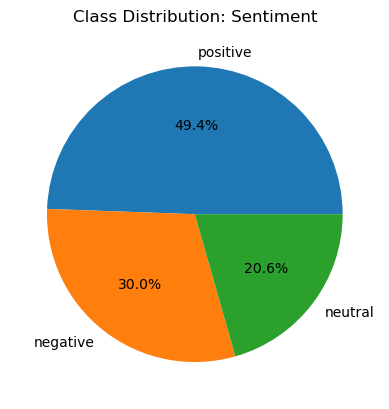

In [11]:

df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Class Distribution: Sentiment")
plt.ylabel("")
plt.show()


## 🔢 Step 12: Cardinality Check

In [12]:

df[categorical_cols].nunique().sort_values(ascending=False)


region         5
platform       4
language       4
device_type    3
sentiment      3
dtype: int64

## 🧼 Step 13: Data Quality Check

In [13]:

print("Duplicates:", df.duplicated().sum())
zero_var_cols = [col for col in df.columns if df[col].nunique() <= 1]
print("Zero-variance Columns:", zero_var_cols)


Duplicates: 0
Zero-variance Columns: []


## ⏱️ Step 14: Time Series Profiling

/var/folders/rr/qt7hnqc976x76s_289xz_wt00000gn/T/ipykernel_93135/874847934.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('review_date')['sentiment_score'].resample('M').mean().plot()


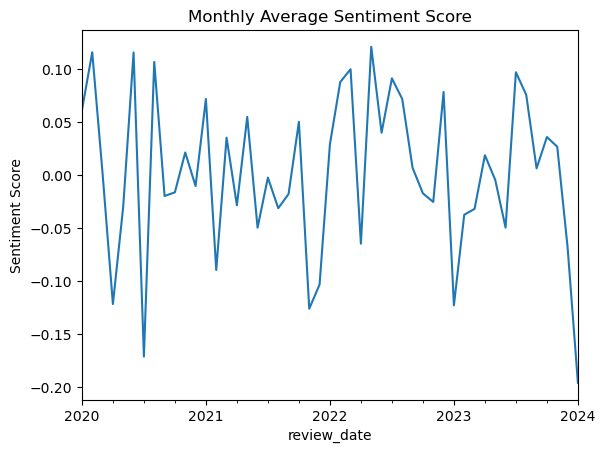

In [14]:

df.set_index('review_date')['sentiment_score'].resample('M').mean().plot()
plt.title("Monthly Average Sentiment Score")
plt.ylabel("Sentiment Score")
plt.show()


## 🧩 Step 15: Multicollinearity (VIF)

In [15]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[numerical_cols].dropna()
X = add_constant(X)
pd.DataFrame({
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    "Feature": X.columns
})


,VIF,Feature
0,4.764332,const
1,1.000116,review_length
2,1.000116,sentiment_score


## 🔁 Step 16: Interaction Effects

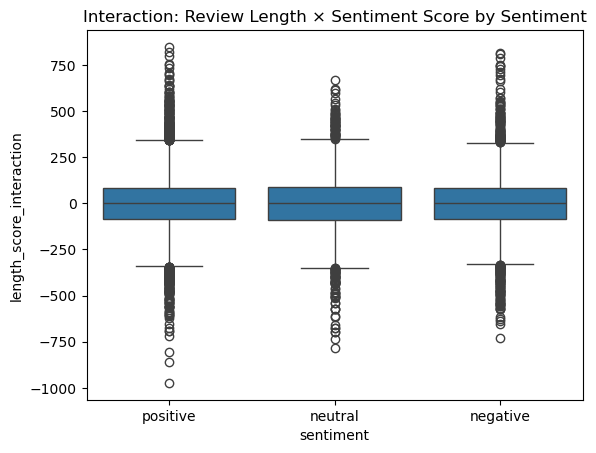

In [16]:

df['length_score_interaction'] = df['review_length'] * df['sentiment_score']
sns.boxplot(x='sentiment', y='length_score_interaction', data=df)
plt.title("Interaction: Review Length × Sentiment Score by Sentiment")
plt.show()


## 🧯 Step 17: Data Leakage Check

In [17]:

df.groupby('sentiment')[['platform', 'language']].value_counts(normalize=True)


sentiment  platform  language
negative   Web       en          0.179393
           AppStore  en          0.176392
           Amazon    en          0.173058
           Twitter   en          0.166389
           AppStore  es          0.030677
           Twitter   fr          0.028676
           AppStore  de          0.028009
           Amazon    es          0.027676
                     de          0.027342
           AppStore  fr          0.027009
           Web       es          0.025008
           Twitter   de          0.023675
           Amazon    fr          0.022341
           Twitter   es          0.021674
           Web       de          0.021340
                     fr          0.021340
neutral    Web       en          0.180758
           Twitter   en          0.177357
           Amazon    en          0.165695
           AppStore  en          0.162293
           Web       es          0.032070
           Twitter   fr          0.031584
                     es          0.029640
    

## 🛠️ Step 18: Feature Engineering Hints

In [18]:

df['upper_case_ratio'] = df['review_text'].str.count(r'[A-Z]') / df['review_length']
df['exclamation_count'] = df['review_text'].str.count('!')
df[['upper_case_ratio', 'exclamation_count']].describe()


,upper_case_ratio,exclamation_count
count,10000.000000,10000.000000
mean,0.011907,0.302500
std,0.011682,0.459364
min,0.003344,0.000000
25%,0.004785,0.000000
50%,0.007692,0.000000
75%,0.013699,1.000000
max,0.100000,1.000000


## 🔍 Step 19: Clustering Patterns

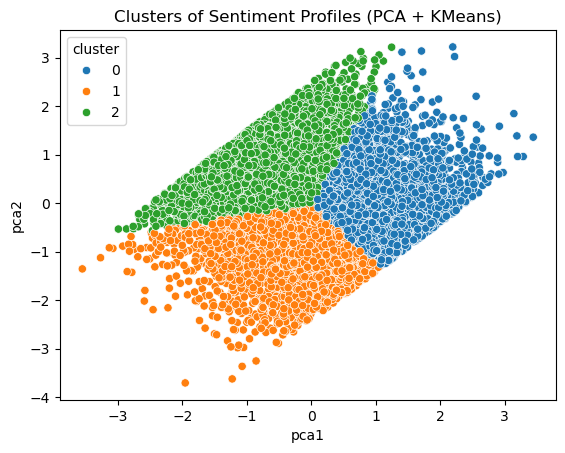

In [19]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

scaled = StandardScaler().fit_transform(df[numerical_cols])
pca = PCA(n_components=2).fit_transform(scaled)
df['pca1'], df['pca2'] = pca[:, 0], pca[:, 1]
df['cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(scaled)

sns.scatterplot(x='pca1', y='pca2', hue='cluster', palette='tab10', data=df)
plt.title("Clusters of Sentiment Profiles (PCA + KMeans)")
plt.show()


## 🤖 Step 20: AutoEDA Tools

In [20]:

# !pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="AutoEDA - Sentiment Analysis", explorative=True)
profile.to_file("autoeda_sentiment_analysis.html")


/Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Summarize dataset:  79%|███████▉  | 19/24 [00:00<00:00, 27.06it/s, Calculate auto correlation]/Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9 4 9 ... 4 9 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 134.55it/s]


## 📐 Step 21: Statistical EDA

In [21]:

from scipy.stats import f_oneway

for col in numerical_cols:
    groups = [group[col].values for name, group in df.groupby('sentiment')]
    stat, p = f_oneway(*groups)
    print(f"ANOVA for {col}: p = {p:.4f}")


ANOVA for review_length: p = 0.6714
ANOVA for sentiment_score: p = 0.7820
